In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [22]:

def calculate_P_E(data):
    attributes = [
        "pleasant",
        "eventful",
        "chaotic",
        "vibrant",
        "uneventful",
        "calm",
        "annoying",
        "monotonous",
    ]  # Define attributes to extract from dataframes
    ISOPl_weights = [
        1,
        0,
        -np.sqrt(2) / 2,
        np.sqrt(2) / 2,
        0,
        np.sqrt(2) / 2,
        -1,
        -np.sqrt(2) / 2,
    ]  # Define weights for each attribute in attributes in computation of ISO Pleasantness
    ISOEv_weights = [
        0,
        1,
        np.sqrt(2) / 2,
        np.sqrt(2) / 2,
        -1,
        -np.sqrt(2) / 2,
        0,
        -np.sqrt(2) / 2,
    ]  # Define weights for each attribute in attributes in computation of ISO Eventfulness
    P = np.mean(
        ((data[attributes] * ISOPl_weights).sum() / (4 + np.sqrt(32)))
    )  # These are normalised ISO Pleasantness values (in [-1,1])
    E = np.mean(
        ((data[attributes] * ISOEv_weights).sum() / (4 + np.sqrt(32)))
    )  # These are normalised ISO Eventfulness values (in [-1,1])
    return pd.Series({"P": P, "E": E})



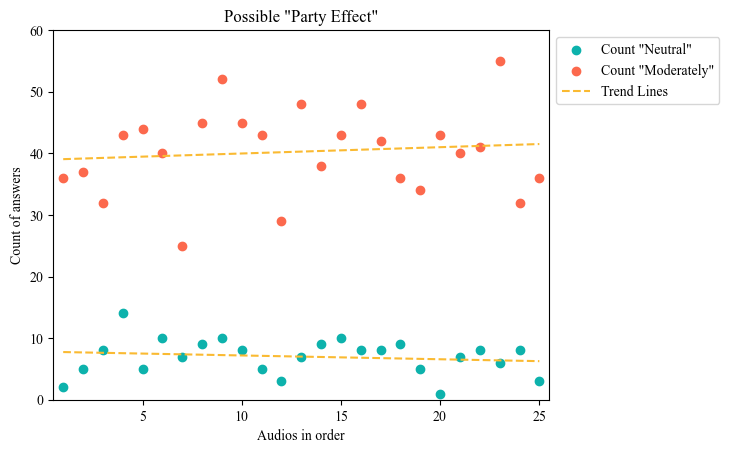

In [89]:
# Read the csv file into a DataFrame
df = pd.read_csv("../data/main_files/all_answers_listening_tests.csv", delimiter=";")

# Separate data into two sub-dataframes
general_df = pd.DataFrame(df[["order","overall"]])
reduced_general_df= pd.DataFrame(df["overall"])
emotions_df= pd.DataFrame(df[["order","pleasant","chaotic","vibrant","uneventful","calm","annoying","eventful","monotonous"]])
reduced_emotions_df= pd.DataFrame(df[["pleasant","chaotic","vibrant","uneventful","calm","annoying","eventful","monotonous"]])

# Count the number of occurrences of 3 in each row and store the result in a new column
general_df["count_of_3s"] = (reduced_general_df == 3).sum(axis=1)
emotions_df["count_of_3s"] = (reduced_emotions_df == 3).sum(axis=1)


# Group by the first column and sum the values in the second column for each group
general_df = general_df.groupby(general_df.iloc[:, 0]).sum()["count_of_3s"]
emotions_df = emotions_df.groupby(emotions_df.iloc[:, 0]).sum()["count_of_3s"]


# Calculate the trend line
x = np.arange(1,26,1)
y_general = general_df.values
slope, intercept, _, _, _ = linregress(x, y_general)
trend_line_general = slope * x + intercept
y_emotions = emotions_df.values
slope, intercept, _, _, _ = linregress(x, y_emotions)
trend_line_emotions = slope * x + intercept

# Display
plt.scatter(x,general_df.values, label='Count "Neutral"', color="#0db2ac")
plt.scatter(x,emotions_df.values, label='Count "Moderately"', color="#fc694d")
plt.plot(x, trend_line_general, color='#faba32', linestyle='--',label='Trend Lines')
plt.plot(x, trend_line_emotions, color='#faba32',linestyle='--')

# Add labels and legend
plt.xlabel('Audios in order')
plt.ylabel('Count of answers')
plt.xlim(0.5,25.5)
plt.ylim(0,60)
plt.title('Possible "Party Effect"')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.rcParams['font.family'] = 'sans-serif'
# Show plot
plt.show()


     order              file       participant  time taken  traffic  \
0        1  freesound_564637  participant_2001          60        1   
1        2   freesound_23063  participant_2001          60        5   
2        3   freesound_93033  participant_2001          60        1   
3        4  freesound_106205  participant_2001          60        1   
4        5  freesound_155281  participant_2001          60        1   
..     ...               ...               ...         ...      ...   
545     21  freesound_342429  participant_2022          60        3   
546     22   freesound_93033  participant_2022          60        1   
547     23  freesound_413913  participant_2022          60        4   
548     24  freesound_170587  participant_2022          60        1   
549     25  freesound_380651  participant_2022          60        1   

     construction  human  natural  pleasant  chaotic  vibrant  uneventful  \
0               1      1        5         5        2        4         

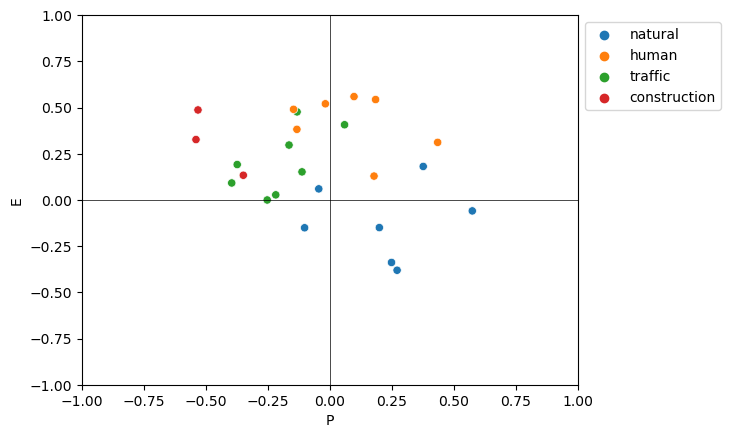

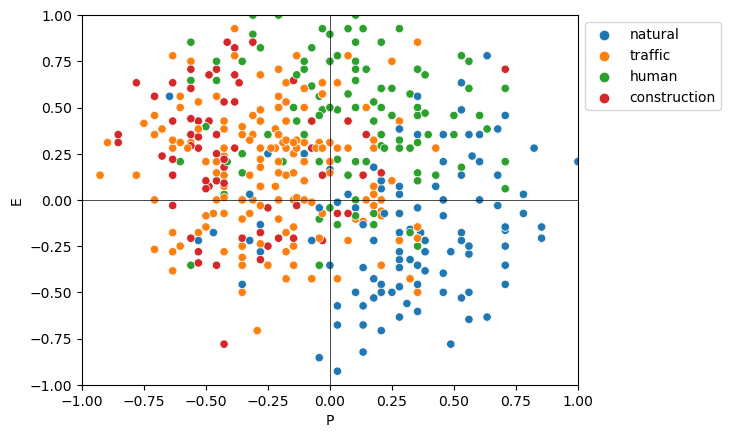

In [45]:
# Read the csv file into a DataFrame
df = pd.read_csv("../data/main_files/all_answers_listening_tests.csv", delimiter=";")


# Apply the function to each row of the DataFrame
df[["P", "E"]] = df.apply(calculate_P_E, axis=1)

# Display the resulting DataFrame
print(df)

df_sources=pd.DataFrame(df[["file", "traffic", "construction", "human", "natural","pleasant","chaotic","vibrant","uneventful","calm","annoying","eventful","monotonous", "P", "E"]])
# Group by the 'file' column and calculate the mean for the other columns
grouped_df = df_sources.groupby("file").mean().reset_index()



# Find the column name with the maximum value for each row
grouped_df['Predominant sources'] = grouped_df[["traffic", "construction", "human", "natural"]].idxmax(axis=1)
df['Predominant sources'] = df[["traffic", "construction", "human", "natural"]].idxmax(axis=1)

# Display the resulting DataFrame
print(grouped_df)

# Scatter plot with Seaborn
sns.scatterplot(data=grouped_df, x="P", y="E", hue="Predominant sources", markers=["o", "s"])
plt.rcParams['font.family'] = 'sans-serif'
# Center the axis lines at zero
plt.xlim(-1, 1)
plt.ylim(-1, 1)
# Draw axis lines like a cross in the middle
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


# Scatter plot with Seaborn
sns.scatterplot(data=df, x="P", y="E", hue="Predominant sources", markers=["o", "s"])
plt.rcParams['font.family'] = 'sans-serif'
# Center the axis lines at zero
plt.xlim(-1, 1)
plt.ylim(-1, 1)
# Draw axis lines like a cross in the middle
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


